In [1]:
%pip install Pillow numpy matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

print("Libraries imported successfully!")

Libraries imported successfully!


In [ ]:
def message_to_binary(message):
    binary_message = ''.join(format(ord(char), '08b') for char in message)
    return binary_message

test_msg = "Hi"
binary_test_msg = message_to_binary(test_msg)
print(f'The message "Hi" in binary is: {binary_test_msg}')
# H = 72 = 01001000
# i = 105 = 01101001

The message "Hi" in binary is: 0100100001101001


In [ ]:
def encode_message(image_path, secret_message, output_path):
    try:
        image = Image.open(image_path).convert("RGB")
    except FileNotFoundError:
        print(f"Error: The file {image_path} was not found.")
        return

    eof_marker = "$$STOP$$"
    full_message = secret_message + eof_marker
    binary_message = message_to_binary(full_message)
    
    data_index = 0
    num_bits_to_hide = len(binary_message)
    image_data = np.array(image)
    total_pixels = image_data.size
    
    if num_bits_to_hide > total_pixels:
        raise ValueError("Error: The message is too long to be encoded in this image.")

    for i in range(image_data.shape[0]):
        for j in range(image_data.shape[1]):
            pixel = image_data[i, j]
            for k in range(3): # For R, G, B channels
                if data_index < num_bits_to_hide:
                    # Modify the LSB of the pixel value
                    pixel[k] = (pixel[k] & ~1) | int(binary_message[data_index])
                    data_index += 1
                else:
                    break
            if data_index >= num_bits_to_hide:
                break
        if data_index >= num_bits_to_hide:
            break
            
    encoded_image = Image.fromarray(image_data)
    encoded_image.save(output_path)
    print(f"Message encoded successfully! Saved to {output_path}")

In [ ]:
def decode_message(image_path):
    try:
        image = Image.open(image_path).convert("RGB")
    except FileNotFoundError:
        print(f"Error: The file {image_path} was not found.")
        return
    
    image_data = np.array(image)
    binary_data = ""
    eof_marker = "$$STOP$$"
    
    for i in range(image_data.shape[0]):
        for j in range(image_data.shape[1]):
            pixel = image_data[i, j]
            for k in range(3):
                # Extract the LSB
                binary_data += str(pixel[k] & 1)

    # Convert binary data to characters
    all_bytes = [binary_data[i: i+8] for i in range(0, len(binary_data), 8)]
    
    decoded_message = ""
    for byte in all_bytes:
        if len(byte) == 8:
            decoded_message += chr(int(byte, 2))
            # Check if we have found the EOF marker
            if decoded_message.endswith(eof_marker):
                # Return the message without the marker
                return decoded_message[:-len(eof_marker)]
                
    return "Could not find a hidden message or EOF marker."

--- Encoding ---
Message encoded successfully! Saved to encoded_image.png


--- Decoding ---
The revealed message is: 'This is a secret message to test LSB steganography. It works!'


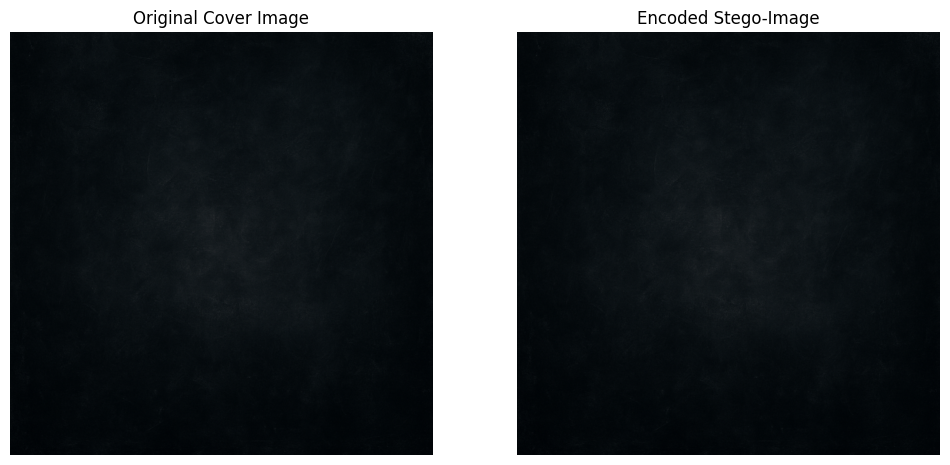


As you can see, the images look identical to the naked eye!


In [ ]:
cover_image_file = "background.png"
encoded_image_file = "encoded_image.png"
my_secret_message = "This is a secret message to test LSB steganography. It works!"

print("--- Encoding ---")
try:
    Image.open(cover_image_file)
except FileNotFoundError:
    print(f"'{cover_image_file}' not found. Creating a dummy 500x500 image.")
    dummy_img = Image.new('RGB', (500, 500), color = 'blue')
    dummy_img.save(cover_image_file)
    
encode_message(cover_image_file, my_secret_message, encoded_image_file)
print("\n")


# 2. Decode the message
print("--- Decoding ---")
revealed_message = decode_message(encoded_image_file)
print(f"The revealed message is: '{revealed_message}'")


# 3. Visualize the difference (or lack thereof)
original = Image.open(cover_image_file)
encoded = Image.open(encoded_image_file)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(original)
axes[0].set_title("Original Cover Image")
axes[0].axis('off')

axes[1].imshow(encoded)
axes[1].set_title("Encoded Stego-Image")
axes[1].axis('off')

plt.show()

print("\nAs you can see, the images look identical to the naked eye!")